# Risk Assesment Report

## Executive Summary




## Overall Trading Partner Risk

Overall CBP reported seizures by country. This is not the predicted risk for our product list but rather historical CBP reported data.

In [69]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

ipr_df = pd.read_csv("data/raw/ipr-seizures-fy19-fy23_0.csv")
ipr_df.head()

,FY,Trading Partner,Mode of Transportation,Centers of Excellence,Product,Unique Seizure ID,Line,MSRP
0,2022,CN,Other,Consumer Products & Mass Merchandising,Other,202201000001,1,49314.32
1,2022,CN,Other,"Apparel, Footwear & Textiles",Wearing Apparel/Accessories,202201000002,1,45391.07
2,2022,CN,Other,"Apparel, Footwear & Textiles",Wearing Apparel/Accessories,202201000002,2,9753.60
3,2022,HK,Express Consignment,Consumer Products & Mass Merchandising,Handbags/Wallets,202201000003,1,30800.00
4,2022,HK,Express Consignment,Consumer Products & Mass Merchandising,Handbags/Wallets,202201000004,1,2840.00


In [92]:
tp_df = (
    ipr_df[ipr_df.Product == "Wearing Apparel/Accessories"]
    .groupby("Trading Partner", as_index=False)
    .size()
    .sort_values(ascending=True, by="size")
)
tp_df.rename(columns={"size": "Seizures"}, inplace=True)
tp_df

,Trading Partner,Seizures
0,CA,460
4,SG,1238
2,HK,21053
5,TR,21280
1,CN,33333
3,Other Countries,52026


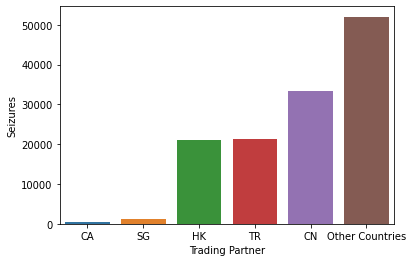

In [94]:
sns.barplot(data=tp_df, x="Trading Partner", y="Seizures")

## High-Value Imports, Inc Product Risk

### Risk Per Trading Partner (over all products)

How many seizures were predicted per trading partner for the list of HVI's products?

In [16]:
import pandas as pd

products_df = pd.read_csv("data/processed/hvi_products_risk.csv")
print("Total Records", len(products_df))
products_df.head()

Total Records 4200


,product_id,brand_name,trading_partner,line_count,msrp,seized_pred
0,2296012,Roadster,cn,24,17.909200,1
1,13780156,LOCOMOTIVE,cn,24,13.727599,0
2,11895958,Roadster,cn,24,16.714456,1
3,4335679,Zivame,cn,24,15.471924,1
4,11690882,Roadster,cn,24,7.156511,1


In [97]:
products_tp_df = (
    products_df[products_df.seized_pred == 1]
    .groupby("trading_partner", as_index=False)
    .size()
).sort_values(ascending=False, by="size")
products_tp_df.rename(
    columns={"size": "Seizures", "trading_partner": "Trading Partner"}, inplace=True
)
products_tp_df

,Trading Partner,Seizures
4,sg,674
5,tr,655
2,hk,547
1,cn,523
3,other countries,462
0,ca,266


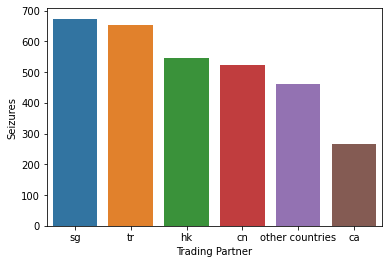

In [99]:
sns.barplot(
    data=products_tp_df,
    x="Trading Partner",
    y="Seizures",
);

### Risk Per Product (over all trading partners)

#### Top 15 Riskiest Products

In [64]:
top15_risk_df = (
    products_df[products_df.seized_pred == 1]
    .groupby("product_id", as_index=False)
    .size()
    .sort_values(ascending=False, by="size")[:15]
)
top15_risk_df.rename(
    columns={"product_id": "Product ID", "size": "Seizures"}, inplace=True
)
top15_risk_df

,Product ID,Seizures
99,17899308,40
12,6791064,36
96,17727536,36
82,16718166,36
48,13504004,36
37,11895958,35
43,12696136,35
21,10307375,35
15,8439415,35
63,15004020,35


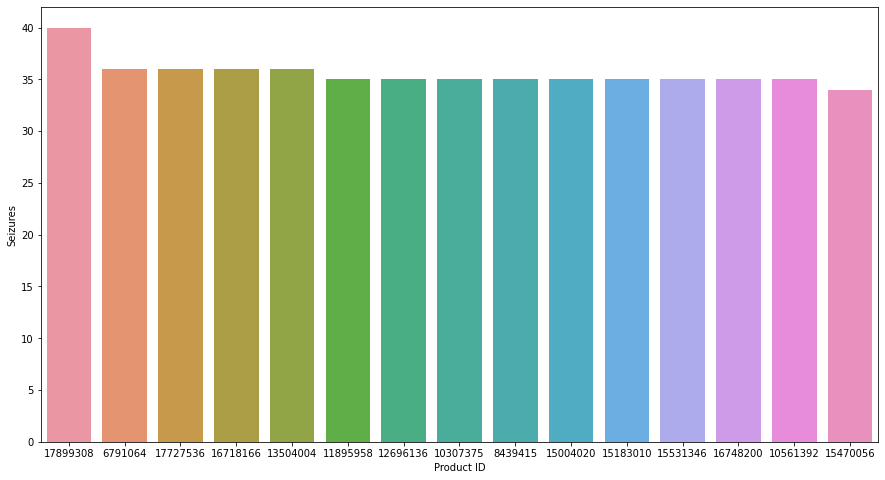

In [86]:
plt.figure(figsize=(15, 8))
sns.barplot(
    data=top15_risk_df, x="Product ID", y="Seizures", order=top15_risk_df["Product ID"]
)

#### Top 15 Safest Products

In [78]:
top15_safe_df = (
    products_df[products_df.seized_pred == 1]
    .groupby("product_id", as_index=False)
    .size()
    .sort_values(ascending=True, by="size")[:15]
)
top15_safe_df.rename(
    columns={"product_id": "Product ID", "size": "Seizures"}, inplace=True
)
top15_safe_df

,Product ID,Seizures
62,14868494,17
69,15599130,20
98,17784638,21
92,17530728,21
35,11634538,21
94,17612862,22
53,14084226,23
40,12153330,24
61,14868168,24
88,17383362,24


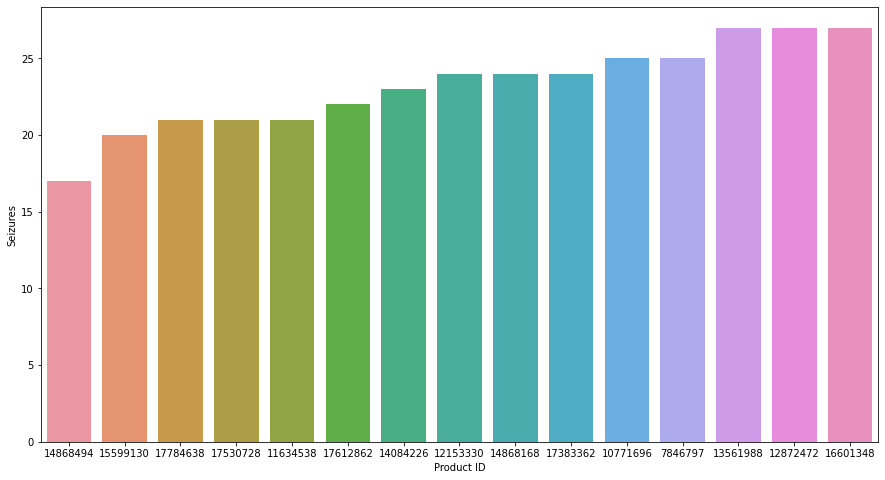

In [85]:
plt.figure(figsize=(15, 8))
sns.barplot(
    data=top15_safe_df, x="Product ID", y="Seizures", order=top15_safe_df["Product ID"]
)

### Risk Per Trading Partner and Product

#### Top 10 Riskiest Trading Partner and Product

In [91]:
top10_risk_tp_products_df = (
    products_df[products_df.seized_pred == 1]
    .groupby(["product_id", "trading_partner"], as_index=False)
    .size()
    .sort_values(ascending=False, by="size")[:10]
)

top10_risk_tp_products_df.rename(
    columns={
        "product_id": "Product ID",
        "trading_partner": "Trading Partner",
        "size": "Seizures",
    },
    inplace=True,
)
top10_risk_tp_products_df

,Product ID,Trading Partner,Seizures
599,17899308,tr,7
137,10367061,tr,7
382,15004020,sg,7
380,15004020,hk,7
142,10441252,sg,7
143,10441252,tr,7
148,10473520,sg,7
149,10473520,tr,7
520,17370302,sg,7
521,17370302,tr,7


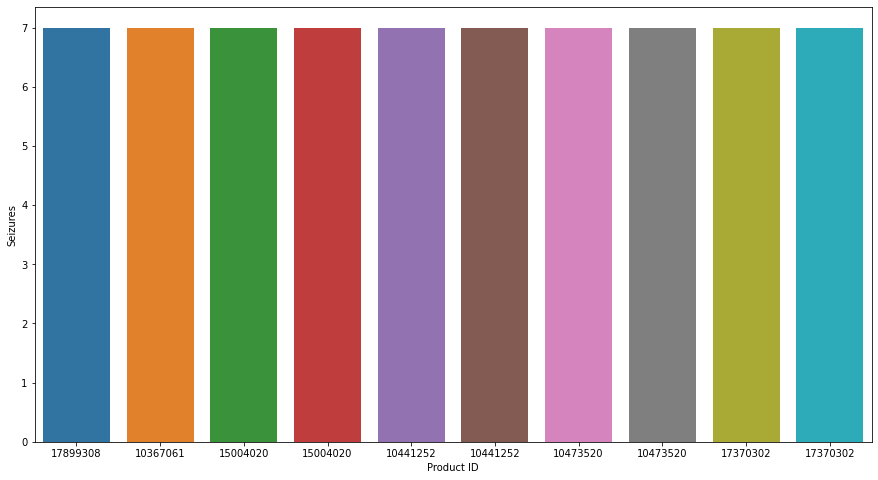

In [103]:
plt.figure(figsize=(15, 8))
sns.barplot(
    data=top10_risk_tp_products_df,
    x="Product ID",
    y="Seizures",
    order=top10_risk_tp_products_df["Product ID"],
);

#### Top 10 Safest Trading Partner and Product

In [112]:
top10_safest_to_products_df = (
    products_df[products_df.seized_pred == 1]
    .groupby(["product_id", "trading_partner"], as_index=False)
    .size()
    .sort_values(ascending=True, by="size")[:10]
)
top10_safest_to_products_df.rename(
    columns={
        "product_id": "Product ID",
        "size": "Seizures",
        "trading_partner": "Trading Partner",
    },
    inplace=True,
)

top10_safest_to_products_df

,Product ID,Trading Partner,Seizures
516,17370302,ca,2
240,12153330,ca,2
246,12345338,ca,2
252,12391750,ca,2
522,17381394,ca,2
264,12872472,ca,2
270,12873874,ca,2
528,17383362,ca,2
282,13205276,ca,2
294,13561988,ca,2


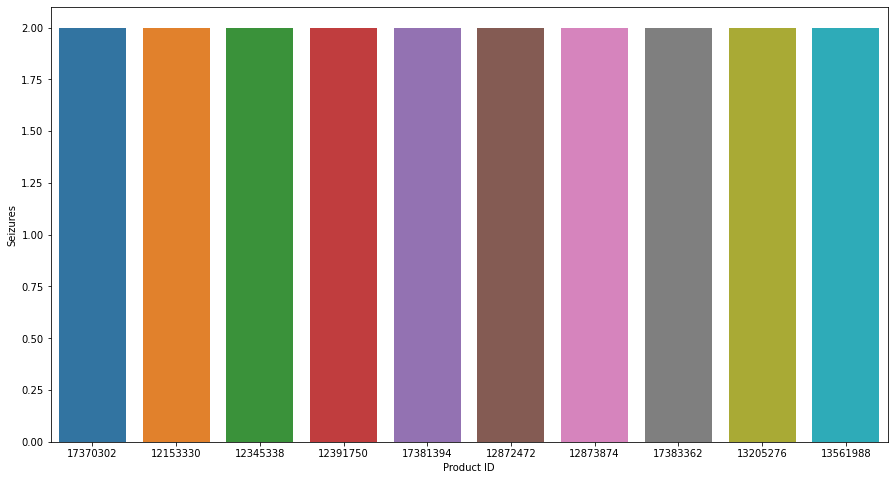

In [113]:
plt.figure(figsize=(15, 8))
sns.barplot(
    data=top10_safest_to_products_df,
    x="Product ID",
    y="Seizures",
    order=top10_safest_tp_products_df["Product ID"],
);